Este notebook é uma coleção de funções e códigos desenvolvidos durante as aulas de Métodos Computacionais em Física. Essas Funções foram escritas para diversas atividades e finalidades e para facilitar a consulta eu compilei todas em um único notebook, já que várias dessas funções são reutilizáveis.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
from matplotlib import rc

matplotlib.rcParams['animation.embed_limit'] = 2**128

#comando necessário para rodar as animações do matplotlib em notebook.
%matplotlib inline

***

### Mapa Logístico


Essa função calcula uma expressão de recorrência do tipo x_n+1=f_(x_n). A expressão usada aqui é a da equação logística (*eq(r,x)* = r\*x\*(1-x)) com o diagrama de bifurcação plotado ao final. A função *x_n* executa N iterações da função *eq* dada e retorna um vetor com os últimos 3 valores da iteração.

In [ ]:
#x0: condição inicial
x0 = float(input())
#N: número de iterações a serem executadas.
N = int(input())
#dr: passo do parâmetro r
dr = float(input())

rvec = np.arange(0,4,dr)
Nr = np.size(rvec)
output = []

def eq(x,r):
  return r*x*(1-x)

def xn(x0,r,N):
  v = []
  for n in range(N-1):
    if (n == 0):
      v.append(eq(x0,r))
    if (n > 0 and n<4):
      v.append(eq(v[-1],r))
    if (n >= 4):
      v.append(eq(v[-1],r))
      v.pop(0)
  return v

for i in rvec:
  output.append(xn(x0,i,N))

plt.title(f'Diagrama de Bifurcação - x0={x0}, N={N}')
plt.xlabel('r')
plt.ylabel('x_n')
plt.scatter(rvec,np.transpose(np.array(output))[-1],s=2,c='black')
plt.scatter(rvec,np.transpose(np.array(output))[-2],s=2,c='black')
plt.scatter(rvec,np.transpose(np.array(output))[-3],s=2,c='black')
plt.show()

***

### Leis de Newton e movimento em 1D


Nesse exercício um objeto de massa m é sujeito a uma força constante F e a um arrasto do tipo *-Bv^2*. O tempo é discretizado e o último passo é dado pelo método de Euler (integração).

*m* é a massa do objeto.

*F* é a força constante.

*B* é a constante da força de arrasto.

*N* é o número de passos no tempo.

*dt* é o tamanho do passo de integração.

*epsilon* é o erro esperado para a velocidade limite.

o código imprime *vlim* que é a velocidade limite para tempos longos e plota a velocidade limite para alguns valores de *B*. 

*f* define a função das forças aplicáveis ao sistema.

*euler* calcula o passo da integração pelo metodo de Euler.

In [ ]:
M=0.1
F=1
B=0.001
V0=0

def g(v):
    return (F/M)-(B/M)*(v**2)

def euler_by_error(f, v0, dt, epsilon):
  v = [v0]
  v.append(v[-1] + f(v[-1])*dt)
  while epsilon<v[-1]-v[-2]:
    v.append(v[-1] + f(v[-1])*dt)
  t = np.arange(0,dt*len(v),dt)
  return t,v

def euler_by_time(f, v0, dt, tf):
  N = int(np.floor(tf/dt))
  v = [v0]
  v.append(v[-1] + f(v[-1])*dt)
  for n in range(N-1):
    v.append(v[-1] + f(v[-1])*dt)
  t = np.arange(0,dt*len(v),dt)
  return t,v

#print("{:10.6e}".format( euler_by_time(g,V0,1000)[-1]))

plt.title(f'Evolução da velocidade')
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
t,v = euler_by_time(g,V0,0.1,1000)
plt.plot(t,v, label=f'B={B} kg/m')
B=0.01
t,v = euler_by_time(g,V0,0.1,1000)
plt.plot(t,v, label=f'B={B} kg/m')
B=0.05
t,v = euler_by_time(g,V0,0.1,1000)
plt.plot(t,v, label=f'B={B} kg/m')
plt.xscale('log')
plt.legend()
plt.show()

***

### Mecânica: Lançamento de Projéteis


Nessa lição utilizamos o método de Euler (da lição anterior) para resolver a equação de movimento do lançamento de um projétil com velocidade inicial v0 e ângulo theta. A função de Euler pode receber um vetor também basta definirmos a função das equações do sistema usando vetores.


*g* é a constante gravitacional

*theta* é uma lista de ângulos iniciais

*v0* é o módulo da velocidade inicial

*x0,y0* é a posição inicial


Esta célula plota a trajetória do projétil de t=0 a t=tf segundos;

In [ ]:
g = 9.80665
tf = 10
theta = [0.3,0.6,0.9]
v0 = 1
x0 = 0
y0 = 0

#V=np.array([x0, y0, v0*np.cos(theta), v0*np.sin(theta)])

def g_projectile(v):
  u = [v[2], v[3], 0, -g]
  return np.array(u)

xmax = []
ymax = []

for i in theta:
  V=np.array([x0, y0, v0*np.cos(i), v0*np.sin(i)])
  t,v = euler_by_time(g_projectile, V, 0.001, tf)
  v = np.transpose(v)
  xmax.append(np.argwhere(v[1]>=0)[-1][0])
  ymax.append(np.argmax(v[1]))
  plt.plot(v[0],v[1], label=f'theta= {i}')

plt.ylim(bottom=0, top=v[1][ymax[np.argmax(ymax)]]*1.05)
plt.xlim(left=0, right=v[0][xmax[np.argmax(xmax)]]*1.05)
plt.legend()
plt.show()

***

### Runge Kutta e Euler


Nessa lição estudamos outro método de integração de equações, o método de Runge Kutta de 2ª ordem e comparamos com o método de Euler. O teste é realizado utilizando um oscilador harmônico (F=-kx). O gráfico mostra a diferença de precisão entre os dois métodos, O método de Euler tende a divergir a Energia, com o acumulo das iterações, muito mais rápido que o método de Runge Kutta, note queo método de runge Kutta parece constante (como esperado para a euqação do oscilador) porém existe uma divergência, porém lenta de mais para ser notada neste gráfico.

In [ ]:
m = 0.1
k = 0.1
tN = 40
dt = 0.1
x0 = 0.2
v0 = 0

tvec=np.arange(0.0,tN+dt,dt)
Nt=np.size(tvec);
xEuler=np.zeros(Nt);
vEuler=np.zeros(Nt);
EnEuler=np.zeros(Nt);
xRK2=np.zeros(Nt);
vRK2=np.zeros(Nt);
EnRK2=np.zeros(Nt);

xEuler[0] = x0
xRK2[0] = x0
vEuler[0] = v0
vRK2[0] = v0
EnEuler[0] = (1/2)*m*(v0**2) + (1/2)*k*(x0**2)
EnRK2[0] = (1/2)*m*(v0**2) + (1/2)*k*(x0**2)

def euler():
    for t in range(Nt-1):
        xEuler[t+1] = xEuler[t]+vEuler[t]*dt
        vEuler[t+1] = vEuler[t]-(k/m)*xEuler[t]*dt
        EnEuler[t+1] = (1/2)*m*(vEuler[t+1]**2) + (1/2)*k*(xEuler[t+1]**2)

def RK2():
    for t in range(Nt-1):
        kx1 = vRK2[t]*dt
        kv1 = -(k/m)*xRK2[t]*dt
        xmeio = xRK2[t]+kx1/2
        vmeio = vRK2[t]+kv1/2
        kx2 = vmeio*dt
        kv2 = -(k/m)*xmeio*dt
        xRK2[t+1] = xRK2[t]+kx2
        vRK2[t+1] = vRK2[t]+kv2
        EnRK2[t+1] = (1/2)*m*(vRK2[t+1]**2) + (1/2)*k*(xRK2[t+1]**2)

euler()
RK2()

plt.plot(tvec,EnRK2, label="Runge Kutta 2 Ordem")
plt.plot(tvec,EnEuler, label='Euler')
plt.title('Energia total do sistema')
plt.xlabel('t (s)')
plt.ylabel('Energia (J)')
plt.legend()
plt.show()

plt.plot(tvec,xRK2, label="Runge Kutta 2 Ordem")
plt.plot(tvec,xEuler, label='Euler')
plt.title('Posição do sistema')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.legend()
plt.show()

***

### Plano de Fase com RK2


Utilização do método de Runge Kutta para solução da equação do pêndulo simples com método de Runge Kutta de 2 Ordem. O plano de fase é plotado também.

In [ ]:
m = 0.1 # in kg
l = 0.5 # in m
theta0 = 0 # in rad
p0 = .1 # in kg m^2/s

g = 10

def simple_pendulum(v,t):
    u = [v[1]/(m*(l**2)), -m*g*l*np.sin(v[0])]
    return np.array(u)

def RK2(eq, Tf, h, v0, transpose=True):
    v0 = np.array(v0)
    t = np.arange(0.0,Tf+h,h)
    Nt = np.size(t)
    v = np.zeros((Nt,len(v0)))
    v[0] = v0
    for n in range(Nt-1):
        k1 = eq(v[n],t[n])*h
        v_hs = v[n] + k1/2
        k2 = eq(v_hs,t[n])*h
        v[n+1] = v[n] + k2
    if (transpose == True):
        v = np.transpose(v)
    return t,v

def normalization(v,up,low):
    while v[v>up].size > 0:
        v[v>up] = v[v>up] - (up-low)
    while v[v<low].size > 0:
        v[v<low] = v[v<low] + (up-low)
    return v

t,v = RK2(simple_pendulum,10,0.05,[theta0,p0])
v[0] = normalization(v[0],np.pi,-np.pi)

E = ((v[1]**2)/(2*m*(l**2))) + m*g*l*(1-np.cos(v[0]))

plt.title('Plano de Fase - Pêndulo Simples')
plt.scatter(v[0],v[1], s=2)
plt.xlabel('theta (rad)')
plt.ylabel('p (kg m^2/s)')
plt.show()

plt.title('Energia - Pêndulo Simples')
plt.plot(t,E)
plt.xlabel('t (s)')
plt.ylabel('E (J)')
plt.show()

***

### Pêndulo Forçado Amortecido


Solução numérica do pendulo forçado amortecido.

In [ ]:
m = 0.1 # in kg
l = 0.5 # in m
h = 0.0005 # in s
Tf = 10 # in s
theta0 = 0 # in rad
p0 = 0.1 # in kg m^2/s
q = 0.5 # in s^-1
tauD = 0.2 # in N.m
OmegaD = 4 # in rad/s

g = 10

def forced_pendulum(v,t):
    u = [v[1]/(m*(l**2)), -m*g*l*np.sin(v[0])-q*v[1]+tauD*np.cos(OmegaD*t)]
    return np.array(u)

t,v = RK2(forced_pendulum,Tf,h,[theta0,p0])
v[0] = normalization(v[0],np.pi,-np.pi)

plt.title('Plano de Fase - Pêndulo Forçado Amortecido')
plt.scatter(v[0],v[1], s=2)
plt.xlabel('theta (rad)')
plt.ylabel('p (kg m^2/s)')
plt.show()

***

### Equação de Onda

Simulação simples de uma onda gaussiana propagando em uma corda. Ao final plotamos a animação da propagação da onda.

In [ ]:
c = 50 # m/s
L = 1 # m
r = 1 # adimensional
dt = 0.0001 # s
tf = 0.0500 # s
xc = 0.3 # m
k = 1000 # m^-1

dx = c*dt/r

t = np.arange(0, tf, dt)
x = np.arange(0, L+dx, dx)
xsize = len(x); tsize = len(t)
y = np.zeros( (xsize,tsize) )

#for i in range(0,xsize,1):
#    y[i][0] = np.exp(-k*(x[i]-xc)**2)

y[:,0] = np.exp(-k*(x-xc)**2)

for n in range(0,tsize-1,1):
    for i in range(1,xsize-1,1):
        if (n == 0):
            y[i][1] = 2*(1-r**2)*y[i][0] + (r**2)*(y[i+1][0]+y[i-1][0]) - y[i][0]
        else:
            y[i][n+1] = 2*(1-(r**2))*y[i][n] + (r**2)*(y[i+1][n]+y[i-1][n]) - y[i][n-1]

def plot_line_anim(x, map, t, Figsize=(10,5)):
  def animate(it):
    line.set_data(x,map[it])
    return line
  plt.tight_layout()
  fig, ax = plt.subplots(1,figsize=Figsize)
  ax.set_ylim(np.amin(map)*1.1,np.amax(map)*1.1)
  line, = ax.plot(x, map[0], linestyle="solid", fillstyle='full')
  anim = FuncAnimation(fig, animate, frames=len(t), interval=25)
  plt.close(fig)
  return anim

Anim = plot_line_anim(x, np.transpose(y), t)
rc('animation', html='jshtml')
Anim


***

### Ondas Estacionárias


Utilizando os mesmos coneceitos da onda em 1D, dessa vez simulamos uma onda estacionária.

In [ ]:
a = np.array([0.5,0,0.5])
N = np.arange(1,len(a)+1,1)
c = 50
dt = 0.0001
tf = 0.05
r = 1

dx = c*dt/r

t = np.arange(0, tf, dt)
x = np.arange(0, 1+dx, dx)
xsize = len(x); tsize = len(t)

y = np.zeros( (xsize,tsize) )

for i in range(0,xsize,1):
    if (i == 0 or i == xsize):
        y[i][0] = 0
    else:
        y[i][0] = np.sum(a*np.sin(np.pi*N*x[i]))

for n in range(0,tsize-1,1):
    for i in range(1,xsize-1,1):
        if (n == 0):
            y[i][1] = 2*(1-r**2)*y[i][0] + (r**2)*(y[i+1][0]+y[i-1][0]) - y[i][0]
        else:
            y[i][n+1] = 2*(1-(r**2))*y[i][n] + (r**2)*(y[i+1][n]+y[i-1][n]) - y[i][n-1]

Anim = plot_line_anim(x, np.transpose(y), t)
rc('animation', html='jshtml')
Anim

***

### Transformada de Fourier Discreta


Nessa lição fazemos uma transformada de Fourier discreta em uma função parecida com a da lição anterior e comparamos com o resultado do módulo numpy.fft().

**Resumo sobre Transformada de Fourier:**


A transformada de Fourier é definida por:

$$y(t)=\int_{-\infty }^{\infty}Y(f)e^{-2\pi ift}df \quad \longleftrightarrow \quad Y(f)=\int_{-\infty }^{\infty}y(t)e^{2\pi ift}dt$$

Onde podemos também realizar a mudança de variáveis $f \to \omega$, onde f é medido em Hz e $\omega$ é medido em rad/s:

$$y(t)=\frac{1}{2\pi}\int_{-\infty }^{\infty}Y\left( \frac{\omega}{2\pi}\right)e^{-i \omega t}d\omega \quad \longleftrightarrow \quad Y\left( \frac{\omega}{2\pi}\right)=\int_{-\infty }^{\infty}y(t)e^{ i \omega t}dt\\

\text{com} \quad \omega=2\pi f$$

Para fazermos a transformada discreta precisamos discretizar a função $y(t) \to y(t_n)$ com $t_n = n. \Delta t$, obtendo:

$$ t_n = 0,\Delta t,2\Delta t,3\Delta t,4\Delta t, ...,(N_t-1)\Delta t\\
n = 0,1,2,3,4,...,(N_t-1) $$

$$ Y\left( \frac{\omega}{2\pi}\right)=\int_{-\infty }^{\infty}y(t)e^{ i \omega t}dt \quad \to \quad \sum_{n=0}^{N_t}y(n)e^{2\pi if_k t_n}\\

\text{com} \quad f_k=\frac{k}{N_t \Delta t} $$

Onde podemos finalmente escrever:

$$ Y\left( k \right)= \sum_{n=0}^{N_t}y(n)e^{\frac{2\pi i k n}{N_t}}$$

*Obs:* a transformada vai retornar uma série simétrica de valores duplicados onde o centro da série é conhecido como a frequência de Nyquist e é dado por:

$$f_{Nyquist}=\frac{N_t-1}{2N_t \Delta t} \approx \frac{1}{2 \Delta t}

In [ ]:
a = np.array([0.5,1,1])
N = np.array([3,9,15])
c = 50
dt = 0.0001
tf = 0.05
r = 1
xc = 0.3
dx = c*dt/r

t = np.arange(0, tf, dt)
x = np.arange(0, 1+dx/2, dx)
xsize = len(x); tsize = len(t)

y = np.zeros( (xsize,tsize) )

Yk = np.zeros(tsize, dtype=complex)

xpos = round (xc/dx)

for i in range(0,xsize,1):
    if (i == 0 or i == xsize):
        y[i][0] = 0
    else:
        y[i][0] = np.sum(a*np.sin(np.pi*N*x[i]))
        
for n in range(0,tsize-1,1):
    for i in range(1,xsize-1,1):
        if (n == 0):
            y[i][1] = 2*(1-r**2)*y[i][0] + (r**2)*(y[i+1][0]+y[i-1][0]) - y[i][0]
        else:
            y[i][n+1] = 2*(1-(r**2))*y[i][n] + (r**2)*(y[i+1][n]+y[i-1][n]) - y[i][n-1]
            
for k in range(0,tsize,1):
    for n in range(0,tsize,1):
        Yk[k] = Yk[k] + y[xpos][n]*np.exp(2*np.pi*1j*k*n/tsize)

fk = np.arange(0,tsize,1)/(tsize*dt)

fig, ax = plt.subplots(2,figsize=(10,5))
plt.tight_layout()
ax[0].plot(t, y[xpos,:], linestyle="solid", fillstyle='full')
ax[0].set_xlabel('t (s)')
ax[0].set_ylabel(f'y(x={xc} m, t)')
ax[1].plot(fk, np.abs(Yk)**2 , linestyle="solid", fillstyle='full')
ax[1].plot(fk, np.abs(np.fft.fft(y[xpos,:]))**2, linestyle="solid", fillstyle='full')
ax[1].set_xlabel('f (Hz)')
ax[1].set_ylabel(f'|Yk(f)|^2')
ax[1].set_xlim(0,500)
plt.show()


***

### Equação de Laplace

Nessa lição vamos utilizar o método de relaxação de Jacobi para resolver a equação de Laplace considerando uma placa com o potencial fixo nas bordas dado por:

* $V(x=0,y) = -1$
* $V(x,y=L) = \frac{2x}{L}-1$
* $V(x=L,y) = 1$
* $V(x,y=0) = \frac{2x}{L}-1$

$$ \nabla^2 V(\bf{r})=0 \quad (eq. Laplace)$$

$$\nabla^2 V(\bf{r})=-\frac{\rho}{\epsilon_0} \quad (eq. Poisson)$$

O algoritmo busca convergência ou o limite de iterações.
O plot mostra a tensão em cada ponto da placa como indicado pelo código de cores.

In [ ]:
L = 1
dx = 0.05
dy = 0.05
eps = 0.0001
Nmax = 100
xsize = round(L/dx)+1
ysize = round(L/dy)+1

V = np.zeros( (xsize,ysize) )

V_old = np.zeros( (xsize,ysize) )

V_old[0:,0] = -1
V_old[0:,-1] = 1
V_old[0] = (2*(np.arange(0,L+dx,dx)/L))-1
V_old[-1] = (2*(np.arange(0,L+dx,dx)/L))-1

N = 1
err = 1
while (err>=eps and N<=Nmax):
    err = 0
    V = np.copy(V_old)
    for i in range(len(V_old)):
        if (i != 0 and i != len(V_old)-1):
            for j in range(len(V_old[i])):
                if (j != 0 and j != len(V_old[i])-1):
                    V[i][j] = (V_old[i+1][j]+V_old[i-1][j]+V_old[i][j+1]+V_old[i][j-1])/4
    err = np.sum(np.abs(V-V_old))
    N = N+1
    V_old = np.copy(V)

fig, ax = plt.subplots(figsize=(7,5))
plt.tight_layout()
a = ax.pcolormesh(np.arange(0,L+dx,dx),np.arange(0,L+dy,dy),V)
fig.colorbar(a, ax=ax, label = "V")
ax.set_xlabel('x')
ax.set_ylabel(f'y')
plt.show()

***

## Campo Elétrico de um Capacitor


Aqui vamos utilizar o método de relação de Jacobi para resolver o potencial elétrico de duas placas paralelas (capacitor). À partir do potencial vamos obter o campo elétrico ($E=-\nabla V$).

In [ ]:
L = 1
dx = 0.05
dy = 0.05
eps = 0.0001
Nmax = 1000
x1 = 0.3
x2 = 0.7
d = 0.6
x = np.arange(0,L+dx,dx)
y = np.arange(0,L+dy,dy)
xsize = len(x)
ysize = len(y)

V_old = np.zeros( (xsize,ysize) )
V_old[round(x1/dx), round((L-d)/dx/2):round((L+d)/dx/2)+1] = -1
V_old[round(x2/dx), round((L-d)/dx/2):round((L+d)/dx/2)+1] = 1
V_old[0,:] = 0
V_old[-1,:] = 0
V_old[:,0] = 0
V_old[:,-1] = 0
V = np.zeros( (xsize,ysize) )
Ex = np.zeros( (xsize,ysize) )
Ey = np.zeros( (xsize,ysize) )

N = 1
err = 1
while (err>=eps and N<=Nmax):
    for i in range(len(V_old)):
        if (i != 0 and i != len(V_old)-1):
            for j in range(len(V_old[i])):
                if (j != 0 and j != len(V_old[i])-1):
                    V[i][j] = (V_old[i+1][j]+V_old[i-1][j]+V_old[i][j+1]+V_old[i][j-1])/4
    V[round(x1/dx), round((L-d)/dx/2):round((L+d)/dx/2)+1] = -1
    V[round(x2/dx), round((L-d)/dx/2):round((L+d)/dx/2)+1] = 1
    V[0,:] = 0
    V[-1,:] = 0
    V[:,0] = 0
    V[:,-1] = 0
    err = np.sum(np.abs(V-V_old))
    N = N+1
    V_old = np.copy(V)

# Calculando E
for i in range(1,xsize-1): #Loop em x
    for j in range(1,ysize-1): #Loop em y
            Ey[i,j] = -(V[i+1,j]-V[i-1,j])/(2*dx)
            Ex[i,j] = -(V[i,j+1]-V[i,j-1])/(2*dy)

# Bordas
for i in range(1,xsize-1): # xsize=ysize pois eh um quadrado
    Ex[i,0] = -(V[i+1,0]-V[i-1,0])/(2*dx)
    Ey[i,0] = -(V[i+1,0]-V[i,0])/(2*dy)
    Ex[i,xsize-1] = -(V[i+1,xsize-1]-V[i-1,xsize-1])/(2*dx)
    Ey[i,xsize-1] = -(V[i,xsize-1]-V[i-1,xsize-1])/(2*dy)
    Ex[0,i] = -(V[0,i+1]-V[0,i])/(2*dx)
    Ey[0,i] = -(V[0,i+1]-V[0,i-1])/(2*dy)
    Ex[xsize-1,i] = -(V[xsize-1,i+1]-V[xsize-1,i])/(2*dx)
    Ey[xsize-1,i] = -(V[xsize-1,i+1]-V[xsize-1,i-1])/(2*dy)

fig, ax = plt.subplots(figsize=(7,5))
plt.tight_layout()
a = ax.contourf(np.arange(0,L+dx,dx),np.arange(0,L+dy,dy),V)
b = ax.quiver(x,y,Ex,Ey)
fig.colorbar(a, ax=ax, label = "V")
ax.set_xlabel('x')
ax.set_ylabel(f'y')
plt.show()

***

## Lei de Biot-Savart


Aqui vamos simular o campo magnético de um fio com corrente constante I, utilizando o método de integração de Simpson. Plotamos o campo vetorial resultante para o z0 escolhido.

*Obs*: utilizamos a função np.kron (Produto de Kronecker) para calcular as coordenadas x,y de vada vetor plotado de maneira rápida. Para cada coordenada tomamos o valor de rho e combinamos com cada valor de seno ou cosseno de modo que para cada valor de rho temos N vetores.

In [ ]:
L = 10      # comprimento do fio
dz = 0.05   # tamanho do trecho de integração
z = np.arange(-L/2,L/2+dz,dz)
z0 = 0      # coordenada z do cálculo do campo; 0 é o centro

def f(r,z):
    return (1/(4*np.pi))*(r/((r**2)+(z0-z)**2)**(3/2))

def integral(f,r):
    if ((np.size(z)%2) == 1):
        f_z = np.zeros(np.size(z))
        for i in range(len(f_z)-1):
            if (i%2 == 1):
                f_z[i] = f(r,z[i])*4
            if (i%2 == 0):
                f_z[i] = f(r,z[i])*2
        f_z[0] = f(r,z[0])
        f_z[-1] = f(r,z[-1])
    if ((np.size(z)%2) == 0):
        f_z = np.zeros(np.size(z))
        for i in range(len(f_z)-1):
            if (i%2 == 1):
                f_z[i] = f(r,z[i])*4
            if (i%2 == 0):
                f_z[i] = f(r,z[i])*2
        f_z[0] = f(r,z[0])
        f_z[-1] = f(r,z[-1])*(5/2)
        f_z[-2] = f(r,z[-2])*(3/2)
    Int = np.sum(f_z)*(dz/3)
    return Int

rho = np.arange(0.1,10,1) # coord. polar
phi = np.arange(0.,2*np.pi,np.pi/10) # coord. polar

x = np.kron(rho,np.cos(phi)) # coord. cart.
y = np.kron(rho,np.sin(phi)) # coord. cart.

xsize = len(x)
ysize = len(y)
sizerho = len(rho)
sizephi = len(phi)

#Calculo do campo 
Bx = np.zeros( (sizerho,sizephi) )
By = np.zeros( (sizerho,sizephi) )

for i in range(sizerho):
  for j in range(sizephi):
    I = integral(f,rho[i])
    Bx[i,j] = -I*np.sin(phi[j])
    By[i,j] = I*np.cos(phi[j])

#Campo plotado: Campo B normalizado (unitário)
Bxplt = np.zeros( (sizerho,sizephi) )
Byplt = np.zeros( (sizerho,sizephi) )

for i in range(sizerho):
  for j in range(sizephi):
    Bxplt[i,j] = -np.sin(phi[j])
    Byplt[i,j] = np.cos(phi[j])

Bcolor = np.zeros( (sizerho,sizephi) )

for i in range(sizerho):
  for j in range(sizephi):
    Bcolor[i,j] = np.sqrt(Bx[i,j]**2 + By[i,j]**2)

# Fazendo os gráficos

origin = 'lower'
fig1, ax2 = plt.subplots(figsize = (12,12))
color = [Bcolor]
CS3 = ax2.quiver(x,y,Bxplt,Byplt,color,scale_units=None,scale=20)
ax2.set_title('Fio finito z=0', fontsize='30')
ax2.set_xlabel('x', fontsize='24')
ax2.set_ylabel('y', fontsize='24')
plt.gca().set_aspect('equal')
plt.show()

***

## Random Walk

Nessa lição introduzimos a noção de caminhada aleatória e fazemos uma simulação básica com alguns plots interessantes sobre a simulação. São considerados uma quantidade n de passos e e Nr caminhadas são realizadas, onde tomamos as médios ao longo dos passos.

In [ ]:
# ntot: número de passos
# Nr: número de caminhadas
# dx: tamanho do passo
# seed: seed do módulo random do numpy
# Cuidado, pois precisa rodar novamente toda vez:

def walk(ntot,Nr,dx,seed=1):
    np.random.seed(seed)
    x = np.zeros((Nr,ntot))
    steps = np.linspace(0,ntot-1,ntot)
    xmedio = np.zeros(ntot)
    xquad = np.zeros(ntot)
    var = np.zeros(ntot)
    for r in range(Nr):
        for i in range(1, ntot, 1):
            p = np.random.uniform(-1,1)
            if (p<0):
                x[r][i] = x[r][i-1] -1*dx
            else:
                x[r][i] = x[r][i-1] +1*dx  
    x = np.transpose(x)
    for k in range(0,ntot,1):
        xmedio[k] = np.sum(x[k])/Nr
        xquad[k] = np.sum(np.power(x[k],2))/Nr
        var[k] = np.sqrt(xquad[k]-xmedio[k]**2)
    return steps, xmedio, xquad, var

a1,b1,c1,d1 = walk(100,1000,1)
a2,b2,c2,d2 = walk(100,100,1)

fig, ax = plt.subplots(2,figsize=(5,5))
plt.tight_layout()
ax[0].plot(a1, b1, linestyle="solid", fillstyle='full')
ax[0].set_xlabel('steps (n)')
ax[0].set_ylabel(f'x médio')
ax[0].set_ylim(-2,2)
ax[1].plot(a1, c1, linestyle="solid", fillstyle='full', label='Nr=1000')
ax[1].plot(a2, c2, linestyle="solid", fillstyle='full', label='Nr=100')
ax[1].set_xlabel('steps (n)')
ax[1].set_ylabel(f'x^2 médio')
ax[1].legend()
plt.show()

***

## Caminhada Aleatória e Equação de Difusão


Aqui vamos comparar a equação de difusão e a caminhada aleatória para estabelecer uma conexão entre os dois processos.

Eq. de Difusão: $$\frac{\partial p(x,t))}{\partial t} =D \frac{\partial^2 p(x,t))}{\partial x^2}\\ \text{com}\quad p(x,t=0)=\delta(x)\quad e \quad \int_{}^{}p(x,t)dx=1 \quad\forall t$$

A solução analítica dessa equação é: $$p(x,t)=\frac{e^{-\frac{x^2}{4tD} }}{\sqrt{4\pi tD}}=\frac{e^{-\frac{x^2}{2\sigma^2(t)} }}{\sigma(t)\sqrt{2\pi}}$$
com $\sigma^2$ a variância (para esse exercício é uma função linear em t) e para a discretização temos:
$$D=\frac{(\Delta x)^2}{2\Delta t}$$

In [ ]:
Nw = 1000
ntot = 300
xmax = 300
dx = 1
dt = 1
seed = 1

xsize = 2*round(xmax/dx) +1
D = (dx**2)/(2*dt)

x = np.array(range(-xmax,xmax+1,dx))
p = np.zeros((ntot,xsize))
p_analitico = np.zeros((ntot,xsize))

# Cuidado, pois precisa rodar novamente toda vez:
np.random.seed(seed)

p[0,xmax] = Nw

for t in range(0,len(p)-1,1):
  for i in range(0,xsize,1):
    if (t>0):
      p_analitico[t,i] = np.exp(-(x[i]**2)/(4*(D)*t*dt))/np.sqrt(4*np.pi*D*t*dt)
    if (p[t,i]!=0):
      for j in range(int(p[t,i])):
        k = np.random.uniform(-1,1)
        if (k<0):
          p[t+1][i-1] = p[t+1][i-1] +1*dx
        else:
          p[t+1][i+1] = p[t+1][i+1] +1*dx

def init():
  for line in lines:
    line.set_data([],[])
  return lines

def animate(it):
  lines[0].set_data(x[:], p[it,:]/(2*Nw*dx))
  lines[1].set_data(x[:], p_analitico[it,:])
  return lines

# Cria "canvas" onde a simulacao serah apresentada
fig, ax = plt.subplots(figsize=(10, 6))


plotlays, plotcols = [2], ['ro',"b"]
lines = []
for index in range(2):
    lobj = ax.plot([],[],plotcols[index])[0]
    lines.append(lobj)
    
ax.set_xlabel("x−x0", fontsize=20)
ax.set_ylabel("p(i,n)", fontsize=20)
ax.set_ylim((.005, .6))
ax.set_xlim((-xmax/4, xmax/4))

plt.tight_layout()

# Define animacao:
anim = FuncAnimation(fig, animate,
                     init_func=init,
                     frames=ntot,
                     interval=100,
                     blit=True)
rc('animation', html='jshtml')
plt.close(fig)
anim

***

## Equações Diferenciais Estocásticas


Vamos solucionar numericamente uma equação diferencial estocástica pelo método de Euler-Murayama. Temos a EDE:

$$dP(t)=\mu P(t)dt + \sigma P(t)W(t) \quad \text{com} \quad P(t=0)=P_0$$

Com a discretização:

$$\Delta P_n=\mu P_n(t)+\sigma P_n \Delta W(t) \quad \text{com} \quad \Delta W(t)=r_n\sqrt{\Delta t}$$

sendo que $r_n$ é uma variável aleatória entre -1 e 1. W(t) é uma variável aleatória que obedece a uma distribuição normal com variância $\sigma_w^2=t$.


O método de Euler-Murayama:

Discretizando no tempo: $t \to t_n=n\Delta t$ e $X(t)\to X_n$

$$X_{n+1}=X_n+\Delta X_n\\ \Delta X_n=a(n,X_n)\Delta t+b(n,X_n)\Delta W_n\\ \Delta W_n=W_{n+1}-W_n=r_n \sqrt{\Delta t}$$

In [ ]:
N = 3
P0 = 10140.05
tf = 365
dt = 1/360
mu = 0.002
sigma = 0.015
seed = 2

np.random.seed(seed)

P = np.zeros((N, round(tf/dt)))

for n in range(N):
  P[n,0] = P0
  for t in range(1,round(tf/dt)-1,1):
    random = np.random.uniform(0.,1.)
    if (random >= .5):
      P[n,t] = P[n,t-1] + mu*P[n,t-1]*dt + sigma*P[n,t-1]*(dt**(1/2))
    else:
      P[n,t] = P[n,t-1] + mu*P[n,t-1]*dt - sigma*P[n,t-1]*(dt**(1/2))

t=np.arange(0,round(tf/dt),1)

fig, ax = plt.subplots(1,figsize=(10,10))
plt.tight_layout()
ax.scatter(t, P[0], s=1)
ax.scatter(t, P[1], s=1)
ax.scatter(t, P[2], s=1)
ax.legend()
plt.show()

***

## Método de Monte-Carlo


Vamos utilizar o método de Monte-Carlo para estimar a área de um circulo e consequentemente o vali de $\pi$.

In [ ]:
N = 10**6
Lb2 = 1
seed = 3111

P = [] # vetor potencia: dar append dos valores calculados a cada potencia de 10

np.random.seed(seed)

bin = 0

for n in range(1,N,1):
  r = np.sqrt(np.random.uniform(0.,Lb2)**2 + np.random.uniform(0.,Lb2)**2)
  if (r<Lb2):
    bin = bin+1
  if (np.mod(np.log10(n),1) == 0):
      P.append((4*bin)/n)

for j in range(len(P)):
    print("{:10.6e}".format(P[j]))

fig, ax = plt.subplots()
ax.scatter(range(len(P)),P)
ax.axhline(np.pi)

***

## Modelo de Ising em 1D


Vamos utilizar o modelo de Ising em 1 dimensão para estimar a magnetização de uma cadeia de spins, em diferentes temperaturas.

In [ ]:
N = 50
Nvar = 1000
T = [.5,1,2]
H = np.arange(-1,1.2,.2)

m = []
Mh = []
M = []
J = 1

for t in T:
  Mh = []
  s = np.random.choice([-1,1],N)
  for h in H:
    m = []
    for n in range(Nvar):
      for k in range(len(s)-1):
        eflip = 2*J*s[k]*(s[k-1]+s[k+1])+2*h*s[k]
        if (eflip<0):
          s[k] = -s[k]
        else:
          pflip = np.exp(-eflip/t)
          if (np.random.uniform(0,1) < pflip):
            s[k] = -s[k]
      m.append(np.sum(s)/N)
    Mh.append(np.sum(m)/Nvar)
  M.append(Mh)

plt.rc('font', size=16)
fig, ax = plt.subplots(figsize=(8,7))
for i in range(len(T)):
  ax.plot(H, M[i],label='T = '+str(T[i]))
ax.set_xlabel('Campo Magnético - h')
ax.set_ylabel('Magnetização média - <m>')
ax.set_title('Magnetização - Modelo de Ising - N='+str(N))
ax.legend(title='Temperatura')

***

## A eq de Schrodinger e o método de Runge Kutta de 2 ordem

Vamos usar o método de Runge Kutta de 2 ordem para simular a solução da eq. de Schrodinger.

In [ ]:
tf = 0.25 # Tempo total
dt = 0.0005 # Passo de tempo
r = 0.075 # Parametro do RK2
L = 1 # Tamanho da caixa
xc = -0.5 # Centro do pacote gaussiano
sigma = 0.1 # Desvio padrao do pacote gaussiano
k0 = 20 # Vetor de onda do pacote gaussiano

dx = np.sqrt(dt/(2*r))

x = -np.arange(-L,L,dx); xsize = len(x) 
t = np.arange(0,tf,dt); tsize = len(t)

R = np.zeros( (xsize,tsize) ) #Parte real
I = np.zeros( (xsize,tsize) ) #Parte complexa
Psi = np.zeros( (xsize,tsize), dtype='complex' )
V = np.zeros( xsize )
k1I = np.zeros( xsize ) # k1 da parte imaginaria
k1R = np.zeros( xsize ) # k1 da parte real
meio = np.zeros( (2,xsize) ) # meios passos
N = np.zeros(tsize) # Integral mostrando a normalizacao

Psi[:,0] = np.sqrt(np.exp(-((x-xc)**2)/(2*sigma**2))/(sigma*np.sqrt(2*np.pi)))*np.exp(1j*k0*x)

R[:,0] = np.real(Psi[:,0]) # Parte real
I[:,0] = np.imag(Psi[:,0]) # Parte complexa

N[0] = np.sum(np.abs(Psi[:,0])**2)*dx

for n in range(tsize-1):
  for i in range(-1,xsize-1,1):
    k1R[i] = -r*(I[i+1,n]-2*I[i,n]+I[i-1,n])+V[i]*I[i,n]*dt
    k1I[i] = r*(R[i+1,n]-2*R[i,n]+R[i-1,n])-V[i]*R[i,n]*dt
    meio[0,i] = R[i,n] + k1R[i]/2
    meio[1,i] = I[i,n] + k1I[i]/2
  for i in range(1,xsize-1,1):
    R[i,n+1] = R[i,n] -r*(meio[1,i+1]-2*meio[1,i]+meio[1,i-1]) +V[i]*meio[1,i]*dt
    I[i,n+1] = I[i,n] +r*(meio[0,i+1]-2*meio[0,i]+meio[0,i-1]) -V[i]*meio[0,i]*dt
  Psi[:,n+1] = R[:,n+1] + I[:,n+1]*1j
  N[n+1] = np.sum(np.abs(Psi[:,n+1])**2)*dx

def init():
  for l in lines:
    l.set_data([], [])
  return lines

def animate(it):
    lines[0].set_data(x, np.real(Psi[:,it]))
    lines[1].set_data(x, np.imag(Psi[:,it]))
    lines[2].set_data(x, np.abs(Psi[:,it])**2)
    return lines

# Cria "canvas" onde a simulacao serah apresentada
fig, ax = plt.subplots(2,figsize=(12, 10))
ax[0].set_xlabel(r"x/L", fontsize=20)
ax[0].set_ylim((-3, 3))
ax[0].set_xlim((-L, L))
ax[1].set_xlabel(r"x/L", fontsize=20)
ax[1].set_ylabel(r"|Ψ(x,t)|^2", fontsize=20)
ax[1].set_ylim((0, 4))
ax[1].set_xlim((-L, L))
lines = [0,0,0]
lines[0], = ax[0].plot([], [], 'r', linestyle="solid", fillstyle='full', label='Real(Psi)')
lines[1], = ax[0].plot([], [], 'b', linestyle="dotted", fillstyle='full', label='Im(Psi)')
lines[2], = ax[1].plot([], [], 'b', linestyle="solid", fillstyle='full')
plt.tight_layout()
plt.close(fig)

# Define animacao:
anim = FuncAnimation(fig, animate,
                     init_func=init,
                     frames=tsize,
                     interval=100,
                     blit=True)
rc('animation', html='jshtml')
anim

***

## Energia esperada de um pacote de onda gaussiano (eq. de Schrodinger)


Nessa lição vamos calcular a energia esperada dee um pacote de onda gaussiano, como simulado na lição anterior.

In [ ]:
tf = 0.05 # Tempo total
dt = 0.0001 # Passo de tempo
r = 0.075 # Parametro do RK2
L = 1 # Tamanho da caixa
xc = -0.5 # Centro do pacote gaussiano
sigma = 0.1 # Desvio padrao do pacote gaussiano
k0 = 20 # Vetor de onda do pacote gaussiano

dx = np.sqrt(dt/(2*r))

x = -np.arange(-L,L,dx); xsize = len(x) 
t = np.arange(0,tf,dt); tsize = len(t)

R = np.zeros( (xsize,tsize) ) #Parte real
I = np.zeros( (xsize,tsize) ) #Parte complexa
Psi = np.zeros( (xsize,tsize), dtype='complex' )
V = np.zeros( xsize )
k1I = np.zeros( xsize ) # k1 da parte imaginaria
k1R = np.zeros( xsize ) # k1 da parte real
meio = np.zeros( (2,xsize) ) # meios passos
HR = np.zeros(xsize) #Hamiltoniano aplicado a parte real
HI = np.zeros(xsize) #Hamiltoniano aplicado a parte imaginaria
N = np.zeros(tsize) # Integral mostrando a normalizacao
E = np.zeros(tsize, dtype='complex' ) # Valor esperado da energia

Psi[:,0] = np.sqrt(np.exp(-((x-xc)**2)/(2*sigma**2))/(sigma*np.sqrt(2*np.pi)))*np.exp(1j*k0*x)

R[:,0] = np.real(Psi[:,0]) # Parte real
I[:,0] = np.imag(Psi[:,0]) # Parte complexa

N[0] = np.sum(np.abs(Psi[:,0])**2)*dx
for i in range(0,xsize-1,1):
  HR[i] = (-1/2)*(R[i+1,0]-2*R[i,0]+R[i-1,0])*(1/(dx**2)) +V[i]*R[i,0]
  HI[i] = (-1/2)*(I[i+1,0]-2*I[i,0]+I[i-1,0])*(1/(dx**2)) +V[i]*I[i,0]
E[0] = np.trapz((np.conjugate(Psi[:,0]))*(HR+(HI*1j)),dx=dx)

for n in range(tsize-1):
  for i in range(-1,xsize-1,1):
    k1R[i] = -r*(I[i+1,n]-2*I[i,n]+I[i-1,n])+V[i]*I[i,n]*dt
    k1I[i] = r*(R[i+1,n]-2*R[i,n]+R[i-1,n])-V[i]*R[i,n]*dt
    meio[0,i] = R[i,n] + k1R[i]/2
    meio[1,i] = I[i,n] + k1I[i]/2
  for i in range(1,xsize-1,1):
    R[i,n+1] = R[i,n] -r*(meio[1,i+1]-2*meio[1,i]+meio[1,i-1]) +V[i]*meio[1,i]*dt
    I[i,n+1] = I[i,n] +r*(meio[0,i+1]-2*meio[0,i]+meio[0,i-1]) -V[i]*meio[0,i]*dt
  for i in range(1,xsize-1,1):
    HR[i] = (-1/2)*(R[i+1,n+1]-2*R[i,n+1]+R[i-1,n+1])*(1/(dx**2)) +V[i]*R[i,n+1]
    HI[i] = (-1/2)*(I[i+1,n+1]-2*I[i,n+1]+I[i-1,n+1])*(1/(dx**2)) +V[i]*I[i,n+1]
  Psi[:,n+1] = R[:,n+1] + I[:,n+1]*1j
  N[n+1] = np.trapz(np.abs(np.power(Psi[:,n+1],2)),dx=dx)
  E[n+1] = np.trapz((np.conjugate(Psi[:,n+1]))*(HR+(HI*1j)),dx=dx)/N[n+1]

fig, ax = plt.subplots(2,figsize=(8, 8))
ax[0].plot(t, np.real(E), linestyle="solid", fillstyle='full', label=r'$\mathcal{R}(\Psi(x,t))}$')
ax[0].plot(t, np.imag(E), linestyle="dotted", fillstyle='full', label=r'$\mathcal{I}(\Psi(x,t))}$')
ax[0].set_xlabel('tempo (s)')
ax[0].set_ylabel('Magnitude Psi')
ax[0].legend()
ax[1].plot(t, N, linestyle="solid", fillstyle='full')
ax[1].set_xlabel('tempo (s)')
ax[1].set_ylabel('Normalização')
plt.show()

***

### Tunelamento


Nessa tarefa utilizamos os resultados das 2 lições anteriores para obter os cosficientes de transmmissão e reflexão de uma pacote gaussiano em um poço infinito.

In [ ]:
tf = 0.05 # Tempo total
dt = 0.0001 # Passo de tempo
r = 0.075 # Parametro do RK2
L = 1 # Tamanho da caixa
xc = -0.5 # Centro do pacote gaussiano
sigma = 0.1 # Desvio padrao do pacote gaussiano
k0 = 20 # Vetor de onda do pacote gaussiano
x1 = -0.05
x2 = 0.1
V0 = 200

dx = np.sqrt(dt/(2*r))

x = np.arange(-L,L,dx); xsize = len(x) 
t = np.arange(0,tf,dt); tsize = len(t)

R = np.zeros( (xsize,tsize) ) #Parte real
I = np.zeros( (xsize,tsize) ) #Parte complexa
Psi = np.zeros( (xsize,tsize), dtype='complex' )
V = np.zeros( xsize )
k1I = np.zeros( xsize ) # k1 da parte imaginaria
k1R = np.zeros( xsize ) # k1 da parte real
meio = np.zeros( (2,xsize) ) # meios passos
HR = np.zeros(xsize) #Hamiltoniano aplicado a parte real
HI = np.zeros(xsize) #Hamiltoniano aplicado a parte imaginaria
N = np.zeros(tsize) # Integral mostrando a normalizacao
E = np.zeros(tsize, dtype='complex' ) # Valor esperado da energia
Ref = np.zeros(tsize) # Valor esperado da energia
Trans = np.zeros(tsize) # Valor esperado da energia

Psi[1:-1,0] = np.sqrt(np.exp(-((x[1:-1]-xc)**2)/(2*sigma**2))/(sigma*np.sqrt(2*np.pi)))*np.exp(1j*k0*x[1:-1])

x_pos_ref = np.where((x <= x1))[0]     # pegar as posições de -inf até x1
x_pos_trans = np.where((x >= x2))[0]   # pegar as posições de x2 até +inf
x_pos_V0 = np.where((x < x2) & (x > x1))[0]   # pegar as posições de x1 até x2

V[x_pos_V0] = V0

R[:,0] = np.real(Psi[:,0]) # Parte real
I[:,0] = np.imag(Psi[:,0]) # Parte complexa

N[0] = np.trapz(np.abs(Psi[:,0])**2,dx=dx)
for i in range(0,xsize-1,1):
  HR[i] = (-1/2)*(R[i+1,0]-2*R[i,0]+R[i-1,0])*(1/(dx**2)) +V[i]*R[i,0]
  HI[i] = (-1/2)*(I[i+1,0]-2*I[i,0]+I[i-1,0])*(1/(dx**2)) +V[i]*I[i,0]
E[0] = np.trapz((np.conjugate(Psi[:,0]))*(HR+(HI*1j)),dx=dx)
Ref[0] = np.trapz(np.abs(Psi[x_pos_ref,0])**2,dx=dx)/N[0]
Trans[0] = np.trapz(np.abs(Psi[x_pos_trans,0])**2,dx=dx)/N[0]

for n in range(tsize-1):
  for i in range(-1,xsize-1,1):
    k1R[i] = -r*(I[i+1,n]-2*I[i,n]+I[i-1,n])+V[i]*I[i,n]*dt
    k1I[i] = r*(R[i+1,n]-2*R[i,n]+R[i-1,n])-V[i]*R[i,n]*dt
    meio[0,i] = R[i,n] + k1R[i]/2
    meio[1,i] = I[i,n] + k1I[i]/2
  for i in range(1,xsize-1,1):
    R[i,n+1] = R[i,n] -r*(meio[1,i+1]-2*meio[1,i]+meio[1,i-1]) +V[i]*meio[1,i]*dt
    I[i,n+1] = I[i,n] +r*(meio[0,i+1]-2*meio[0,i]+meio[0,i-1]) -V[i]*meio[0,i]*dt
  for i in range(1,xsize-1,1):
    HR[i] = (-1/2)*(R[i+1,n+1]-2*R[i,n+1]+R[i-1,n+1])*(1/(dx**2)) +V[i]*R[i,n+1]
    HI[i] = (-1/2)*(I[i+1,n+1]-2*I[i,n+1]+I[i-1,n+1])*(1/(dx**2)) +V[i]*I[i,n+1]
  Psi[:,n+1] = R[:,n+1] + I[:,n+1]*1j
  N[n+1] = np.trapz(np.abs(Psi[:,n+1])**2,dx=dx)
  E[n+1] = np.trapz((np.conjugate(Psi[:,n+1]))*(HR+(HI*1j)),dx=dx)/N[n+1]
  Ref[n+1] = np.trapz(np.abs(Psi[x_pos_ref,n+1])**2,dx=dx)/N[n+1]
  Trans[n+1] = np.trapz(np.abs(Psi[x_pos_trans,n+1])**2,dx=dx)/N[n+1]

fig, ax = plt.subplots(2,figsize=(8, 4))
lines = [0]
lines[0], = ax[1].plot([], [], linestyle="solid", fillstyle='full')

def init():
  lines[0].set_data([], [])
  return lines

def animate(it):
  lines[0].set_data(x, np.abs(Psi[:,it])**2)
  return lines

ax[0].plot(t,Ref,label='Reflexão')
ax[0].plot(t,Trans,label='Transmissão')
ax[1].set_xlabel(r"x/L")
ax[1].set_ylabel(r"|Psi|^2")
ax[1].set_ylim((1, 4))
ax[1].set_xlim((-L, L))
ax[1].axvline(x=x1)
ax[1].axvline(x=x2)
ax[0].legend()
plt.tight_layout()
plt.close(fig)

anim = FuncAnimation(fig, animate,
                     init_func=init,
                     frames=tsize,
                     interval=100,
                     blit=True)
rc('animation', html='jshtml')
anim


***

## Sistema de Dois Níveis


Nesse sistema temos um espaço de Hilbert com dois auto estados, sendo $\epsilon_n^0$ os auto valores de energia de cada auto estado. Esse sistema pode ser representado por matrizes e o primeiro plot mostra o que acontece quando o Hamiltoniano é exato e quando ele é formado pelos mesmos autovalores, mas a diagonal secundária não é 0, de modo que seus valores dependem de k.

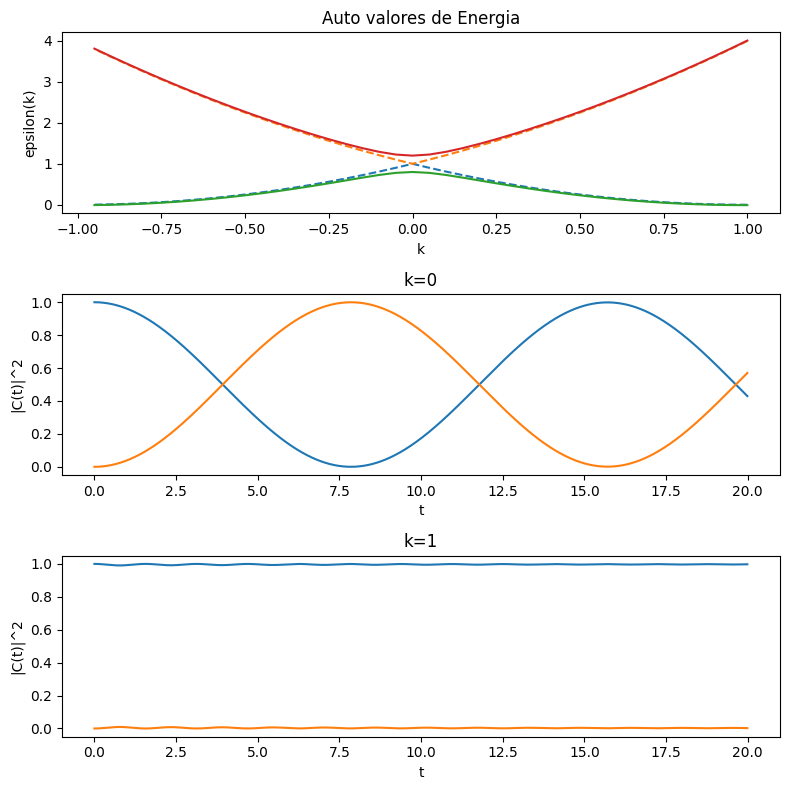

In [8]:
Gamma = 0.2
t0 = 0
tf = 20
dt = 0.01
C10 = 1
C20 = 0

h = 1

k = -np.arange(-1,1,0.05); ksize = len(k) #para o calculo das energias
t = np.arange(t0,tf,dt); tsize = len(t) #para o calculo da evoução temporal

psi0 = np.array( [C10,C20] )
psi_k0 = np.zeros( (2,tsize) , dtype = "complex")
psi_k1 = np.zeros( (2,tsize) , dtype = "complex")

psi_k0[:,0] = psi0
psi_k1[:,0] = psi0

def Hk(k,g):
  return np.array([[(k+1)**2,g],[g,(k-1)**2]])

for n in range(len(t)-1):
  for ki,kv in enumerate(k):
    psi_k0[:,n+1] = np.dot(np.eye(2) - (1j*dt/h)*(Hk(0,Gamma)), psi_k0[:,n])/np.linalg.norm(np.dot(np.eye(2) - (1j*dt/h)*(Hk(0,Gamma)), psi_k0[:,n]))
    psi_k1[:,n+1] = np.dot(np.eye(2) - (1j*dt/h)*(Hk(1,Gamma)), psi_k1[:,n])/np.linalg.norm(np.dot(np.eye(2) - (1j*dt/h)*(Hk(1,Gamma)), psi_k1[:,n]))

fig, ax = plt.subplots(3,figsize=(8,8))
e = np.zeros((len(k),2))
H = np.zeros((len(k),2,2))
for ki,kv in enumerate(k):
  e[ki] = np.linalg.eigvalsh(Hk(kv,0))
ax[0].plot(k, e[:,0], '--')
ax[0].plot(k, e[:,1], '--')
for ki,kv in enumerate(k):
  e[ki] = np.linalg.eigvalsh(Hk(kv,Gamma))
ax[0].plot(k, e[:,0])
ax[0].plot(k, e[:,1])
ax[1].plot(t, np.abs(psi_k0[0,:])**2, '-')
ax[1].plot(t, np.abs(psi_k0[1,:])**2, '-')
ax[2].plot(t, np.abs(psi_k1[0,:])**2, '-')
ax[2].plot(t, np.abs(psi_k1[1,:])**2, '-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('epsilon(k)')
ax[1].set_xlabel('t')
ax[1].set_ylabel('|C(t)|^2')
ax[2].set_xlabel('t')
ax[2].set_ylabel('|C(t)|^2')
ax[0].set_title('Auto valores de Energia')
ax[1].set_title('k=0')
ax[2].set_title('k=1')
plt.tight_layout()
plt.show()



***

## Introdução a Redes Neurais


Nesse exercício vamos programar um neurônio para aprender a minimizar a distância entre os dados de entrada e uma reta. Efetivamente vamos fazer um MMQ e portanto vamos comparar com o resultado do calculo de um MMQ.

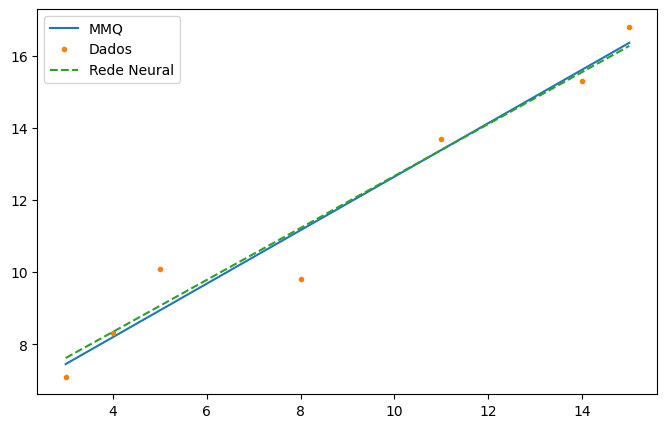

In [11]:
N = 7
x = np.zeros(N)
y = np.zeros(N)
x = np.array([3, 4, 5, 8, 11, 14, 15])
y = np.array([7.1, 8.3, 10.1, 9.8, 13.7, 15.3, 16.8])
hiper = 0.01
W = 1
b = 6
eps = 0.0001

Y = np.zeros(N) # Output da rede neural
Ymmq = np.zeros(N) # Output MMQ

Y = W*x + b
C0 = (1/N)*np.sum((y-(W*x+b))**2)
C1 = 0
i=0
while (np.abs(C1-C0) > eps and i<1000):
  C0 = C1
  dW = (2*hiper/N)*np.sum((y-Y)*x)
  db = (2*hiper/N)*np.sum((y-Y))
  W = W + dW
  b = b + db
  C1 = (1/N)*np.sum((y-(W*x+b))**2)
  Y = W*x + b
  i+=1

A = np.array([ x, x**0 ]) 
X = np.matmul( np.linalg.pinv( A ).T, y )
Ymmq = np.matmul(X,A)

fig, ax = plt.subplots(1,figsize=(8,5))
ax.plot(x,Ymmq, '-', label='MMQ')
ax.plot(x,y, '.', label='Dados')
ax.plot(x,Y, '--', label="Rede Neural")
ax.legend()
plt.show()

***

## Redes Neurais: Classificação de portas lógicas

Nessa atividade vamos reutilizar o algoritmo da aula anterior para treinar um neurônio para trabalhar como portas lógicas AND e OR.

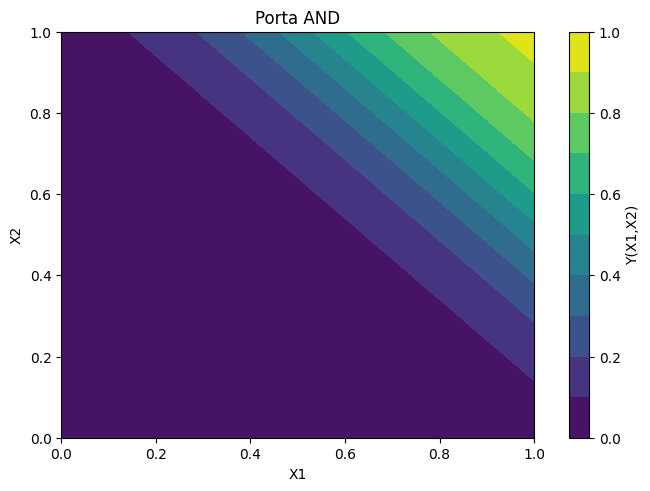

In [14]:
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
y = np.array([0,0,0,1])


hiper = 1 # % hiperparametro
W1 = 0.4 # % Coef angular 1 inicial
W2 = 0.6 # % Coef angular 2 inicial
b = 0.7 # % Coef linear inicial
eps = 0.0001 # Erro maximo aceitavel
Nt = 2000 #Numero maximo de iteracoes

def sigF(x1out, x2out, W1, W2 , b):
  z = W1*x1out + W2*x2out + b
  return 1/(1+np.exp(-z))

N = len(y)
eta = np.finfo(float).eps
#C1 = (1/N)*np.sum((-y*np.log(sigF(x1, x2, W1, W2 , b)+eta))-(1-y)*np.log(1-sigF(x1, x2, W1, W2 , b)+eta))
C1 = 1
C0 = 0
i=0
while (np.abs(C1-C0) > eps and i<Nt):
  C0 = C1
  Y = sigF(x1, x2, W1, W2 , b)
  dW1 = (hiper/N)*np.sum((y-sigF(x1, x2, W1, W2 , b))*x1)
  dW2 = (hiper/N)*np.sum((y-sigF(x1, x2, W1, W2 , b))*x2)
  db = (hiper/N)*np.sum(y-sigF(x1, x2, W1, W2 , b))
  W1 = W1 + dW1
  W2 = W2 + dW2
  b = b + db
  C1 = (1/N)*np.sum((-y*np.log(Y+eta))-(1-y)*np.log(1-Y+eta))
  i+=1

x1o = np.arange(0.1,1,0.2)
x2o = np.arange(0.1,1,0.2)
x1out,x2out = np.meshgrid(x1o,x2o)
Yo = sigF(x1out, x2out, W1, W2 , b)

x1p,x2p = np.meshgrid(np.arange(0.0,1.01,0.01),np.arange(0.0,1.01,0.01))
Yp =  sigF(x1p, x2p, W1, W2, b)
origin = 'lower'
fig, ax = plt.subplots(constrained_layout=True)
CS = ax.contourf(x1p, x2p, Yp, 10, origin=origin)
fig.colorbar(CS, ax=ax, label = "Y(X1,X2)")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("Porta AND")

plt.show()

***

## Reconhecimento de Padrões com modelo de Ising


Aqui vamos utilizar o modelo de Ising para identificar letras numa imagem formada por pixels de 0 e 1. O método de Monte Carlo minimiza a energia de modo que o neurônio identifica o imagem como esperado. A imagem distorcida é dada à rede de modo que as varreduras transformam a imagem em uma das letras treinadas. 

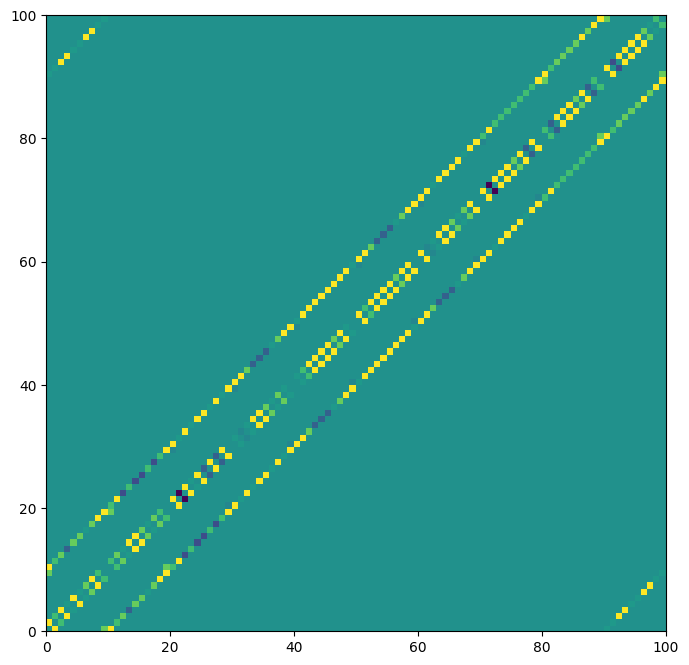

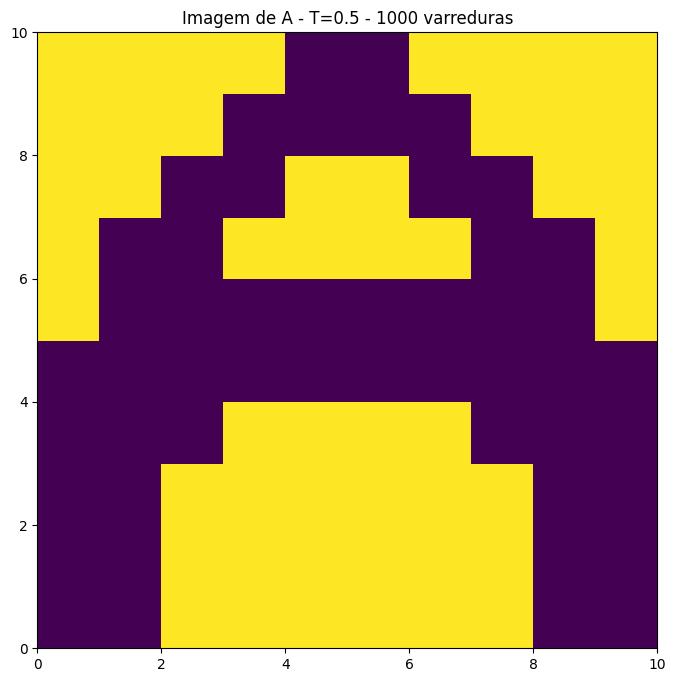

In [19]:
#% Matriz letra Atorto Grande
Atorto = np.array([ [ 1,  1, -1, -1, -1, -1,  1,  1,  1,  1], \
         [ 1, -1, -1,  1, -1, -1, -1,  1,  1,  1], \
         [-1, -1,  1,  1,  1,  1, -1,  1,  1,  1], \
         [-1, -1, -1,  1,  1,  1,  1, -1,  1,  1], \
         [-1, -1, -1, -1, -1,  1,  1, -1,  1,  1], \
         [-1, -1, -1, -1, -1, -1, -1, -1, -1,  1], \
         [-1, -1, -1,  1,  1, -1, -1, -1, -1,  1], \
         [-1, -1,  1,  1,  1,  1,  1,  1, -1,  1], \
         [-1, -1,  1,  1,  1,  1,  1,  1, -1, -1], \
         [-1,  1,  1,  1,  1,  1,  1,  1, -1, -1] ]); Atorto=-Atorto;
#% Matriz letra Ctorto grande
Ctorto = np.array([ [ 1,  1,  1,  1, -1, -1, -1, -1, -1, 1], \
         [ 1,  1,  1, -1, -1, -1, -1, -1, -1, 1], \
         [ 1, -1, -1, -1,  1,  1,  1,  1,  1, 1], \
         [ 1, -1,  1,  1,  1,  1,  1,  1,  1, 1], \
         [-1, -1,  1,  1,  1,  1,  1,  1,  1, 1], \
         [-1, -1,  1,  1,  1,  1,  1,  1,  1, 1], \
         [-1, -1,  1,  1,  1,  1,  1,  1, -1, 1], \
         [-1, -1,  1,  1,  1,  1, -1, -1,  1, 1], \
         [ 1, -1, -1, -1, -1, -1, -1,  1,  1, 1], \
         [ 1,  1,  1, -1, -1,  1,  1,  1,  1, 1] ]); Ctorto=-Ctorto;

# % Criando matrizes para aprendizado
# % Matriz letra A Grande
A = np.array([ [1, 1, 1, 1, -1, -1, 1, 1, 1, 1], \
               [1, 1, 1, -1, -1, -1, -1, 1, 1, 1], \
               [1, 1, -1, -1, 1, 1, -1, -1, 1, 1], \
               [1, -1, -1, 1, 1, 1, 1, -1, -1, 1], \
               [1, -1, -1, -1, -1, -1, -1, -1, -1, 1], \
               [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], \
               [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], \
               [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1], \
               [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1], \
               [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1] ]); A = -A;

# % Matriz letra B grande
B = np.array([ [-1, -1, -1, -1, -1, -1, -1,  1, 1, 1], \
               [-1, -1,  1,  1,  1,  1, -1, -1, 1, 1], \
               [-1, -1,  1,  1,  1,  1, -1, -1, 1, 1], \
               [-1, -1,  1,  1,  1,  1, -1, -1, 1, 1], \
               [-1, -1, -1, -1, -1, -1, -1,  1, 1, 1], \
               [-1, -1, -1, -1, -1, -1 ,-1 , 1, 1, 1], \
               [-1, -1,  1,  1,  1,  1, -1, -1, 1, 1], \
               [-1, -1,  1,  1,  1,  1, -1, -1, 1, 1], \
               [-1, -1,  1,  1,  1,  1, -1, -1, 1, 1], \
               [-1, -1, -1, -1, -1, -1, -1,  1, 1, 1] ]); B = -B;
    
# % Matriz letra B grande
C = np.array([ [ 1,  1, -1, -1, -1, -1, -1, -1, -1, 1], \
               [ 1, -1, -1, -1, -1, -1, -1, -1, -1, 1], \
               [-1, -1,  1,  1,  1,  1,  1,  1,  1, 1], \
               [-1, -1,  1,  1,  1,  1,  1,  1,  1, 1], \
               [-1, -1,  1,  1,  1,  1,  1,  1,  1, 1], \
               [-1, -1,  1,  1,  1,  1,  1,  1,  1, 1], \
               [-1, -1,  1,  1,  1,  1,  1,  1,  1, 1], \
               [-1, -1,  1,  1,  1,  1,  1,  1,  1, 1], \
               [ 1, -1, -1, -1, -1, -1, -1, -1, -1, 1], \
               [ 1,  1, -1, -1, -1, -1, -1, -1, -1, 1] ]); C = -C;

# % Matriz letra A simples
Azinho = np.array([ [-1, -1,  1, -1, -1], \
                    [-1,  1, -1,  1, -1], \
                    [ 1,  1,  1,  1,  1], \
                    [ 1, -1, -1, -1,  1], \
                    [ 1, -1, -1, -1,  1] ])

def buildJ(figura):
  N = len(figura)
  J = np.zeros( (N**2,N**2) )
  for m in range(-1,N-1): #linhas
    for n in range(-1,N-1): #colunas
      i,jr,jd,jl,ju = ij(m,n,N)
      J[i,jr] = figura[m,n+1]*figura[m,n]
      J[i,jd] = figura[m+1,n]*figura[m,n]
      if (jr>i):
        J[i,jr] = figura[m,n+1]*figura[m,n]
      if (jd>i):
        J[i,jd] = figura[m+1,n]*figura[m,n]
  J = np.transpose(J)+J
  #J = np.transpose(J)
  return J

def Ene(J,f):
  e = 0
  N = len(f)
  for m in range(-1,N-1): #linhas
    for n in range(-1,N-1): #colunas
      i,jr,jd,jl,ju = ij(m,n,N)
      e += -(J[i,jd]*f[m,n]*f[m+1,n])-(J[i,jr]*f[m,n]*f[m,n+1])
  return e

def ij(m,n,N):
  if (n == -1):
    if (m == -1):
      i = N*(N-1) + (N-1)
      jr = N*(N-1)
      jl = N*(N-1) + (N-2)
      jd = N-1
      ju = N*(N-2) + (N-1)
    else:
      i = N*(m) + (N-1)
      jr = N*(m)
      jl = N*(m) + (N-2)
      jd = N*(m+1) + (N-1)
      ju = N*(m-1) + (N-1)
  else:
    if (m == -1):
      i = N*(N-1) + n
      jr = N*(N-1) + (n+1)
      jl = N*(N-1) + (n-1)
      jd = n
      ju = N*(N-2) + n
    else:
      i = N*m + n
      jr = N*(m) + (n+1)
      jl = N*(m) + (n-1)
      jd = N*(m+1) + n
      ju = N*(m-1) + n
  return i,jr,jd,jl,ju

Js = np.array([buildJ(A),buildJ(B),buildJ(C)])
En = np.array([Ene(Js[0],Atorto),Ene(Js[1],Atorto),Ene(Js[2],Atorto)])
lbd = En/np.sum(En)
Jlbd = lbd[0]*Js[0]+lbd[1]*Js[1]+lbd[2]*Js[2]

i,j = np.nonzero(Jlbd)
size = len(i)

fig, ax = plt.subplots(figsize=(8,8))
ax.pcolor(Jlbd)
plt.show()

def metro(t,J,fig,Nvar):
  N = len(fig)
  s = np.random.choice([-1,1],(N,N))
  for k in range(1,Nvar):
    for i in range(-1,N-1): #linha
      for j in range(-1,N-1): #coluna
        m,nr,nd,nl,nu = ij(i,j,N)
        eflip = 2*s[i,j]*( (J[m,nl]*s[i,j-1]) + (J[m,nr]*s[i,j+1]) + (J[m,nd]*s[i+1,j]) + (J[m,nu]*s[i-1,j]) )
        if (eflip<0):
          s[i,j] = -s[i,j]
        else:
          pflip = np.exp(-eflip/t)
          if (np.random.uniform(0,1) < pflip):
            s[i,j] = -s[i,j]
  return s

Output = metro(0.5,Jlbd,Atorto,1000)
fig, ax = plt.subplots(figsize=(8,8))
ax.pcolor(np.flip(Output,0))
ax.set_title('Imagem de A - T=0.5 - 1000 varreduras')
plt.show()